In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt


In [2]:

data_file_directory = '/home/orhun/PycharmProjects/DSL2018-Proj-Climate-Science/data/data_preprocessed_labeled.h5'

# Load data from h5 file
f = h5py.File(data_file_directory, 'r')

# Get year list
keys = list(f.keys())
print(len(keys))

# Get feature names for the first example
a = f[keys[0]]
print(list(a.keys()))

# Data fields that we need
data_fields = \
        ['wind_60', 'wind_65', 'CP07', "U&T", "U65"]


1137
['CP07', 'U&T', 'U65', 'ZPOL_temp', 'temp_60_70', 'temp_60_90', 'temp_80_90', 'wind_60', 'wind_65']


In [3]:
# Get data

dat = np.array(
        [[f[key][data_field] for data_field in data_fields] for key in keys])

(1137, 5, 210)
(1137, 210)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  2.,  1.,  1.,  2.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,
        1.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  3.,  1.,  1.,  4.,  0.,
        1.,  2.,  7.,  2.,  2.,  2.,  6.,  2.,  2.,  3.,  5.,  4.,  1.,
        3.,  1.,  0.,  2.,  3.,  1.,  5.,  5.,  6.,  2.,  2.,  0.,  3.,
        4.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,  6.,  3.,  4.,  6.,  7.,
        2.,  2.,  6.,  5.,  4.,  4.,  2.,  4.,  4.,  6.,  3.,  2., 35.,
        5., 10.,  4.,  1.,  4.,  6.,  4.,  8., 11.,  4.,  4.,  1.,  5.,
        8.,  6.,  0.,  5.,  5.,  5.,  2., 11.,  5.,  6.,  3.,  5.,  5.,
        2.,  9.,  4.,  8.,  6., 14.,  7.,  5.,  8.,  3.,  3.,  6.,  6.,
        5.,  7.,  7.,  5.,  1.,  2.,  4.,  3.,  8.,  6.,  5.,  7.,  4.,
        5.,  8.,  6.,  9.,  7.,  1.,  5.,  3.,  4.,  5.,  4.,  6.,  4.,
        2.,  5.,  5.,  4.,  7.,  3.,  4.,  6.,  2.,  4.,  3.,  2.,  3.,
        4.,  1.,  2.,  7.,  2.,  3.,  4.,  5.,  2.,  4.,  6.,  0

In [14]:
label_index = 2 #CP07

print(dat.shape)
print(dat[:,label_index,:].shape)

# Distribution of CP07 labels
# Observe that last month is always empty CP07 --> no SSWs in April
np.sum(dat[:,label_index,:], axis=0)

(1137, 5, 210)
(1137, 210)


array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
        0.,  1.,  2.,  1.,  1.,  2.,  0.,  1.,  1.,  1.,  1.,  2.,  2.,
        1.,  2.,  2.,  1.,  1.,  1.,  1.,  2.,  3.,  1.,  1.,  4.,  0.,
        1.,  2.,  7.,  2.,  2.,  2.,  6.,  2.,  2.,  3.,  5.,  4.,  1.,
        3.,  1.,  0.,  2.,  3.,  1.,  5.,  5.,  6.,  2.,  2.,  0.,  3.,
        4.,  1.,  2.,  2.,  2.,  2.,  3.,  3.,  6.,  3.,  4.,  6.,  7.,
        2.,  2.,  6.,  5.,  4.,  4.,  2.,  4.,  4.,  6.,  3.,  2., 35.,
        5., 10.,  4.,  1.,  4.,  6.,  4.,  8., 11.,  4.,  4.,  1.,  5.,
        8.,  6.,  0.,  5.,  5.,  5.,  2., 11.,  5.,  6.,  3.,  5.,  5.,
        2.,  9.,  4.,  8.,  6., 14.,  7.,  5.,  8.,  3.,  3.,  6.,  6.,
        5.,  7.,  7.,  5.,  1.,  2.,  4.,  3.,  8.,  6.,  5.,  7.,  4.,
        5.,  8.,  6.,  9.,  7.,  1.,  5.,  3.,  4.,  5.,  4.,  6.,  4.,
        2.,  5.,  5.,  4.,  7.,  3.,  4.,  6.,  2.,  4.,  3.,  2.,  3.,
        4.,  1.,  2.,  7.,  2.,  3.,  4.,  5.,  2.,  4.,  6.,  0

3.0
92
[[-1.28128959]
 [-1.72280995]
 [-0.02566102]]
[[ 41]
 [138]
 [172]]


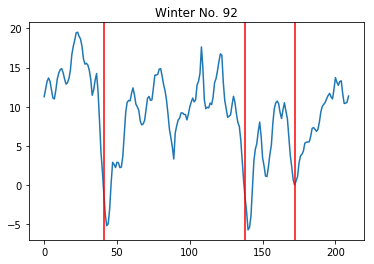

In [37]:
# Count SSWs for each winter
winter_labels = np.sum(dat[:,label_index,:], axis=1)

# Get Max # of SSWs
print(winter_labels.max())

#92 winter is interesting
print(winter_labels.argmax())

ind = np.argwhere(dat[winter_labels.argmax(),2,:] == 1)

print(dat[winter_labels.argmax(),0,:][ind])
print(ind)

plt.title("Winter No. {}".format(winter_labels.argmax()))
plt.plot(dat[winter_labels.argmax(),0,:])
for ssw in ind:
    plt.axvline(x=ssw,color='r')


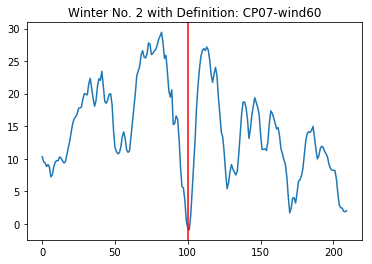

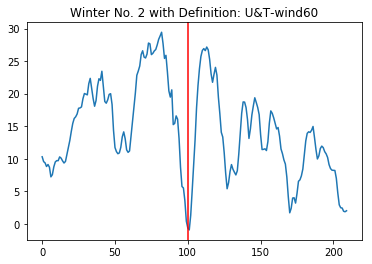

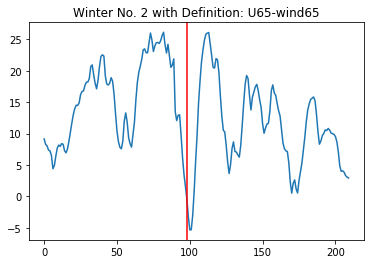

In [45]:
#Function to visualize a winter

def winter_visualization(dat, ind):
    # A list of indices to look at dat, corresponding to an SSW definition and the data it is looking for.
    # (i.e CP07 - wind60)
    
    definition_and_wind_index = [[2,0,"CP07-wind60"],[3,0,"U&T-wind60"],[4,1,"U65-wind65"]]
    
    for defn_i, ts_i, desc in definition_and_wind_index:
        
        plt.title("Winter No. {} with Definition: {}".format(ind, desc))
        plt.plot(dat[ind,ts_i,:])
        ssw_ind = np.argwhere(dat[ind,defn_i,:] == 1)
   
        for ssw in ssw_ind:
            plt.axvline(x=ssw,color='r')
        plt.show()

winter_visualization(dat,2)
    

572
565


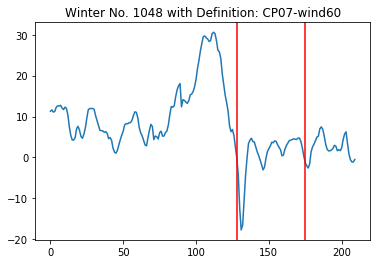

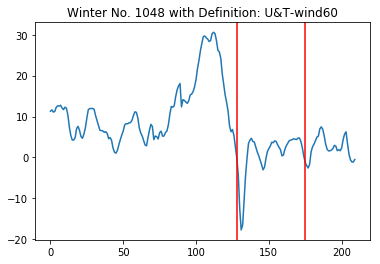

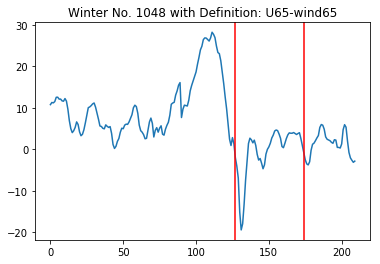

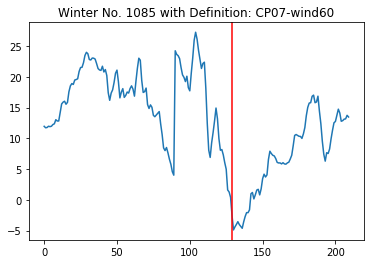

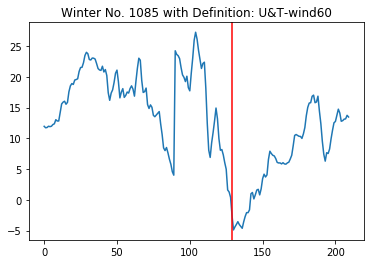

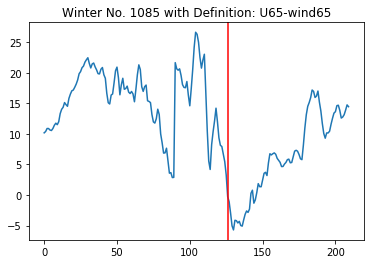

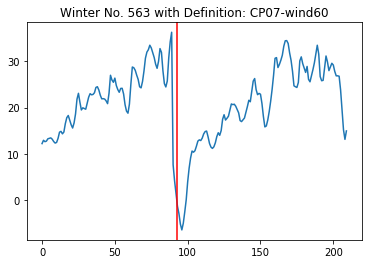

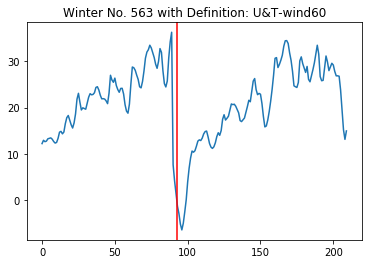

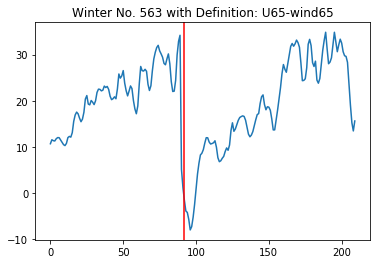

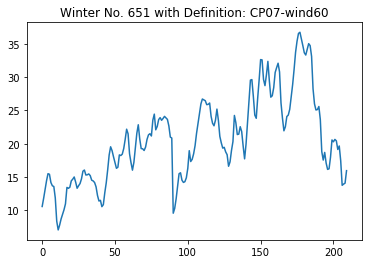

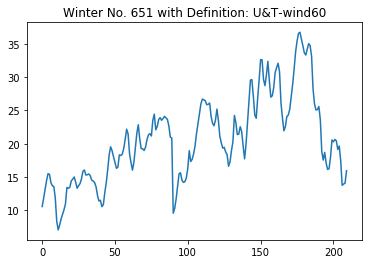

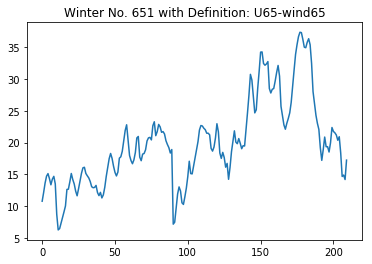

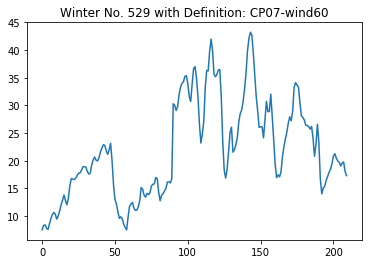

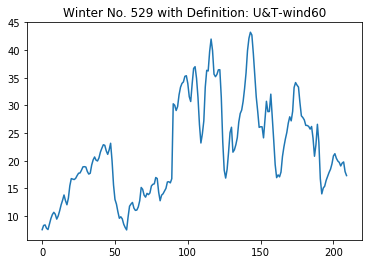

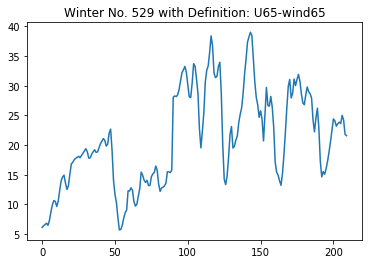

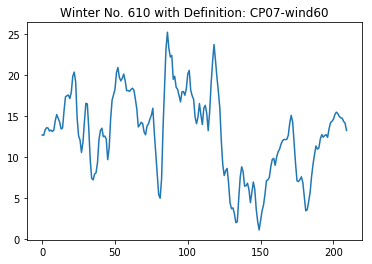

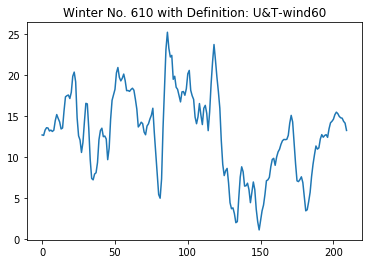

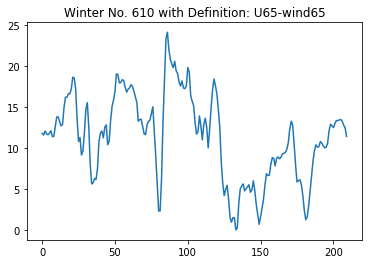

In [82]:
label_index = 2 #CP07

winter_labels = np.sum(dat[:,label_index,:], axis=1)

#Create indices
ssw_winter_indeces = np.zeros(dat.shape[0], bool)
ssw_winter_indeces[np.argwhere(winter_labels > 0) ] = True
non_ssw_winter_index = np.invert(ssw_winter_indeces)

#number of SSW vs. non SSW winters
print(np.sum(ssw_winter_indeces))
print(np.sum(non_ssw_winter_index))

#Visualize 3 random SSW and non_SSW_winters
ssws = np.argwhere(winter_labels > 0).flatten()
nonssws = np.argwhere(winter_labels == 0).flatten()
arr = [ssws,nonssws]

for winter_type in arr:
    randm = np.random.choice(winter_type, 3)
    for val in randm:
        winter_visualization(dat, val)



In [74]:
np.random.choice(ssws, 3)

array([378, 348, 700])